# Exercise Raster Data

For this exercise, you will explore the NASA site to acquire various raster data
  * Site: [NASA's earth observations](https://neo.sci.gsfc.nasa.gov/).


You will acquire various raster datasets, then render and interpret them.


## Population Land Maps

 * Locate the Population maps download two versions:
   * 1.0 degree resolution, Grayscale GeoTIFF
   * 0.1 degree resolution, Grayscale GeoTIFF

#### Note: To aid in keeping the two resolutions separate in code, please
  * use a variable: `file_path_small` for 1.0 degree resolution
  * use a variable: `file_path_large` for 0.1 degree resolution


In [3]:
## M5:E1:Cell01
# Add your code to download the 1.0 degree file
#--------------------------------
import urllib.request
import shutil
from pathlib import Path


file_URL = 'https://neo.sci.gsfc.nasa.gov/servlet/RenderData?si=875430&cs=gs&format=JPEG&width=360&height=180'# Add Code Here

local_file_name = 'world_population.tiff'# Add Code Here

file_path_small = Path('../temp/')
file_path_small /= local_file_name


# Add URL Fetch and File Write Code
with urllib.request.urlopen(file_URL) as response, file_path_small.open(mode='w+b') as outfile:
    shutil.copyfileobj(response, outfile)


In [2]:
## M5:E1:Cell02
# Add your code to download the 0.1 file
#--------------------------------
import urllib.request
import shutil
from pathlib import Path


file_URL = 'https://neo.sci.gsfc.nasa.gov/servlet/RenderData?si=875430&cs=gs&format=JPEG&width=3600&height=1800'# Add Code Here

local_file_name = 'world_population_large.tiff'# Add Code Here

file_path_large = Path('../temp/')
file_path_large /= local_file_name


# Add URL Fetch and File Write Code
with urllib.request.urlopen(file_URL) as response, file_path_large.open(mode='w+b') as outfile:
    shutil.copyfileobj(response, outfile)


### Review RasterIO documentation on Plotting:

https://mapbox.github.io/rasterio/topics/plotting.html

Using Google and other resources, 
locate a link that describes the available `cmap` options for plotting the rasters with the `rasterio.plot.show()` function.


### Task: In the three cells below, experiment with three different renderings of the population data at 1.0 degree resolution.

##### Adjusting Figure Size to allow upto = 15 x 15
```
# Note: This line will alter the plot figure size!
rasterio.plot.get_plt().figure(figsize=(15,15))
```

/usr/lib64/python3.4/site-packages/rasterio/__init__.py:193: UserWarning: Dataset has no geotransform set.  Default transform will be applied (Affine.identity())
  s.start()


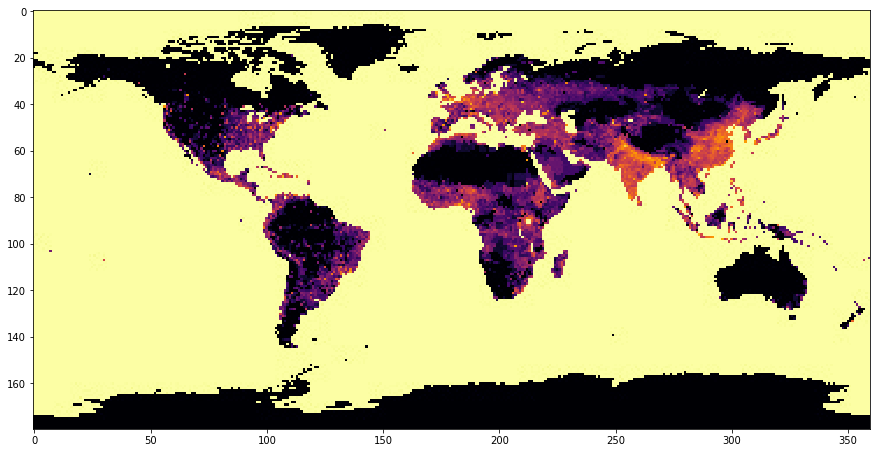

In [5]:
## M5:E1:Cell04
# Add your code to download the file
#--------------------------------
import rasterio

RASTER_DATA_FILE = '../temp/world_population.tiff'
raster_data = rasterio.open(RASTER_DATA_FILE)

%matplotlib inline
from rasterio.plot import show
rasterio.plot.get_plt().figure(figsize=(15,15))
rasterio.plot.show(raster_data.read(),cmap='inferno')


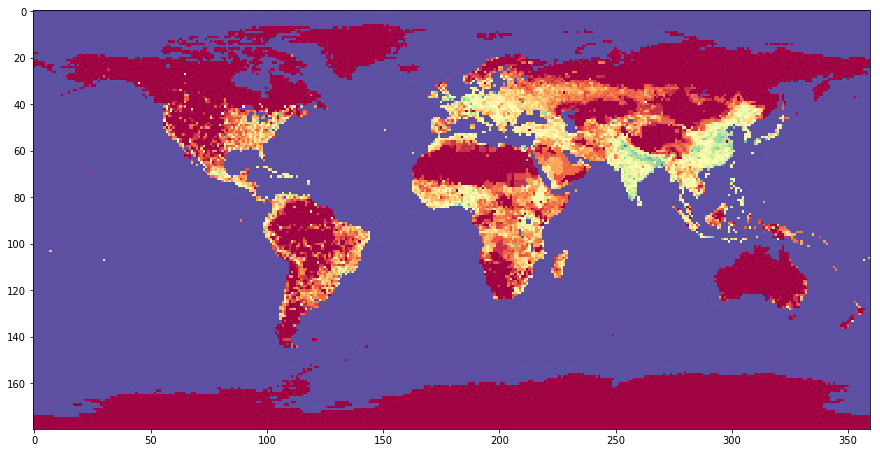

In [15]:
## M5:E1:Cell05
# Add your code to download the file
#--------------------------------
rasterio.plot.get_plt().figure(figsize=(15,15))
rasterio.plot.show(raster_data.read(),cmap='Spectral')




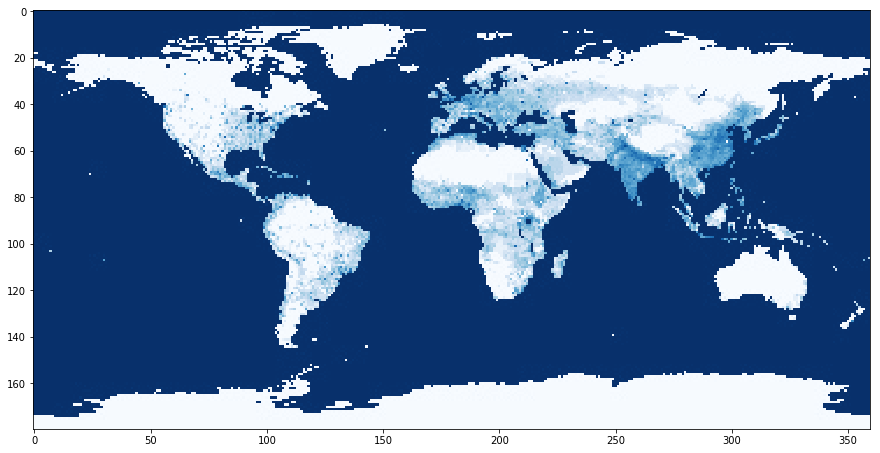

In [10]:
## M5:E1:Cell06
# Add your code to download the file
#------------------------------------------
rasterio.plot.get_plt().figure(figsize=(15,15))
rasterio.plot.show(raster_data.read(),cmap='Blues')



## Task: Using your favorite color map above, render the other scale of the population map!

/usr/lib64/python3.4/site-packages/rasterio/__init__.py:193: UserWarning: Dataset has no geotransform set.  Default transform will be applied (Affine.identity())
  s.start()


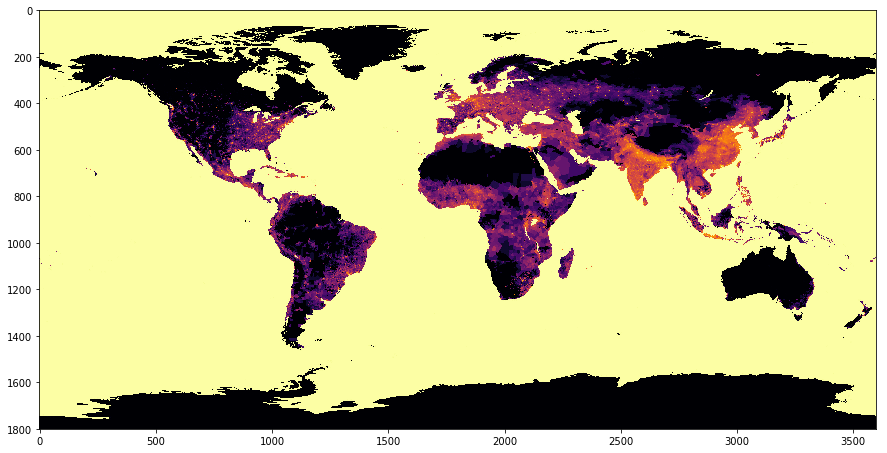

In [16]:
## M5:E1:Cell07
# Add your code to download the file
#--------------------------------
RASTER_DATA_FILE='../temp/world_population_large.tiff'
raster_data1 = rasterio.open(RASTER_DATA_FILE)

%matplotlib inline
from rasterio.plot import show
rasterio.plot.get_plt().figure(figsize=(15,15))
rasterio.plot.show(raster_data1.read(),cmap='inferno')


### What is the visual difference between the `file_path_large` (0.1 degree) and `file_path_small` (1.0) degree) image renderings?

### Visual Interpretation 

Create a visualization or pair of visualizations that allows a viewer to understand how the population aligns to the country borders.



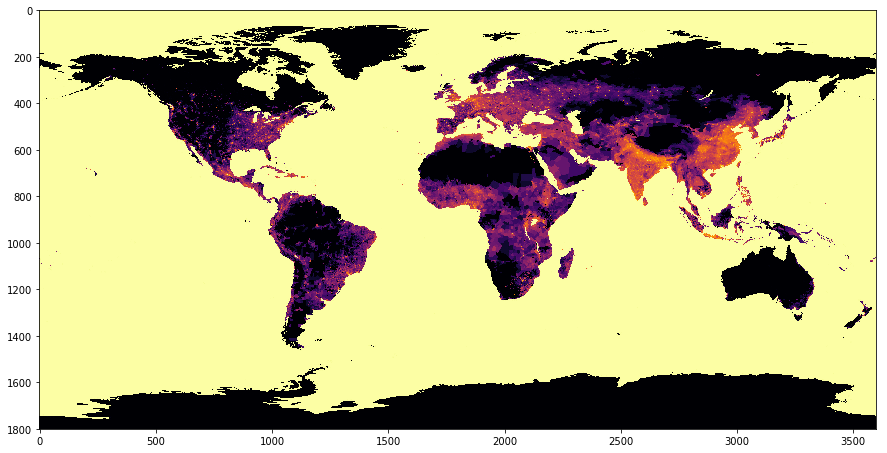

In [17]:
## M5:E1:Cell09 - part 1
# Add your code below
#--------------------------------

%matplotlib inline
from rasterio.plot import show
rasterio.plot.get_plt().figure(figsize=(15,15))
rasterio.plot.show(raster_data1.read(),cmap='inferno')



In [20]:
## M5:E1:Cell09 - part 2 (as needed)
# Add your code below
#--------------------------------
from zipfile import ZipFile
# Designate the URL for a file
file_URL = 'http://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip'

# Designate the local filename
local_file_name = 'ne_admin_countries.zip'

# Designate the local file name with a path to a temp directory.
     # Your Repo comes with this folder.  If not, use terminal and 
     # navigate to course folder > module3 and them : mkdir temp
file_Path = Path('../temp/')  
file_Path /= local_file_name

# Download the file from `url` and save it locally under `file_Path`:
with urllib.request.urlopen(file_URL) as response,  file_Path.open(mode='w+b') as out_file:
    shutil.copyfileobj(response, out_file)

# unzip file
to_unzip = ZipFile('../temp/ne_admin_countries.zip', 'r')
unzipped = '../temp/ne_admin_countries'
to_unzip.extractall(unzipped)

import geopandas as gpd

countries = gpd.read_file('../temp/ne_admin_countries')


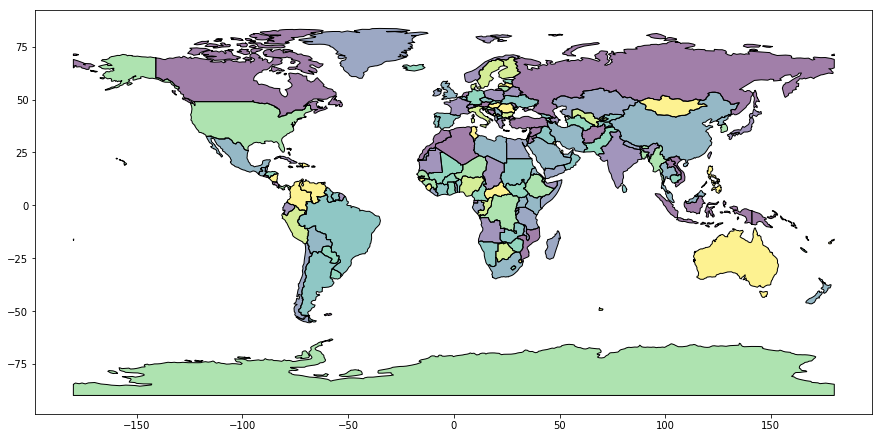

In [22]:
countries.plot(figsize=(15,15))

### What are the two most populous countries according to your visualization?

# Save your Notebook

## Then, File > Save and Halt